This notebook explores relationships between microbiome diversity,
neonatal infection status, and post-vaccination IgA responses.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set(style="whitegrid")
print("imports ok")


imports ok


In [23]:
os.listdir("../data/raw/")


['.DS_Store', 'RoVI_metadata_by_sample.csv']

In [24]:
df = pd.read_csv(
    "../data/raw/RoVI_metadata_by_sample.csv",
    encoding="latin1"
)

print("data loaded")

data loaded


In [25]:
print(df.head())



   Unnamed: 0 family_ID       sample_ID_full   input  filtered  denoised  \
0           1      I001  tLIMS15089s3I001BM2   81480     70036     70036   
1           2      I001  tLIMS15089s2I001BM3  152766    133149    133149   
2           3      I001  tLIMS15089s1I001BM1  168091    146427    146427   
3           4      I001  tLIMS12416s4I001BS5  178315    144529    144529   
4           5      I001  tLIMS12416s2I001BS1  158136    130440    130440   

   merged  nonchimeric  final_count           sample_ID  ... birth_weight  \
0   69865        69490        69490  LIMS15089s3I001BM2  ...          3.1   
1  131896       121591       121591  LIMS15089s2I001BM3  ...          3.1   
2  144339       128533       128533  LIMS15089s1I001BM1  ...          3.1   
3  142223       121016       121016  LIMS12416s4I001BS5  ...          3.1   
4  129454       117065       117065  LIMS12416s2I001BS1  ...          3.1   

  breastfed_child antibiotic_exposure HIV_status weight_6_8w WAZ_6_8w  \
0      

In [26]:
cols = list(df.columns)
cols

['Unnamed: 0',
 'family_ID',
 'sample_ID_full',
 'input',
 'filtered',
 'denoised',
 'merged',
 'nonchimeric',
 'final_count',
 'sample_ID',
 'site',
 'run',
 'control',
 'sample_code',
 'sample_type',
 'country',
 'week',
 'week_fig',
 'sample_group',
 'sample_group_fig',
 'sample_number',
 'nanodrop_ngul',
 'wc_country',
 'is.neg',
 'subjectID',
 'country_arm',
 'country_exposure',
 'MS1_VP6_labID',
 'MS1_VP6_ct',
 'MS1_VP6_copies',
 'MS1_VP6_cat',
 'BS1_VP6_labID',
 'BS1_VP6_ct',
 'BS1_VP6_copies',
 'BS1_VP6_cat',
 'BS2_VP6_labID',
 'BS2_VP6_ct',
 'BS2_VP6_copies',
 'BS2_VP6_cat',
 'BS3_VP6_labID',
 'BS3_VP6_ct',
 'BS3_VP6_copies',
 'BS3_VP6_cat',
 'BS4_VP6_labID',
 'BS4_VP6_ct',
 'BS4_VP6_copies',
 'BS4_VP6_cat',
 'BS5_VP6_labID',
 'BS5_VP6_ct',
 'BS5_VP6_copies',
 'BS5_VP6_cat',
 'BS6_VP6_labID',
 'BS6_VP6_ct',
 'BS6_VP6_copies',
 'BS6_VP6_cat',
 'BS4_NSP2_labID',
 'BS4_NSP2_ct',
 'BS4_NSP2_copies',
 'BS6_NSP2_labID',
 'BS6_NSP2_ct',
 'BS6_NSP2_copies',
 'AG_labID',
 'AG_Concugml'

In [27]:
[c for c in cols if "IgA" in c or "iga" in c]


['MB1_IgA',
 'MB1_IgA_cat',
 'CB1_IgA',
 'CB1_IgA_cat',
 'BB1_IgA',
 'BB1_IgA_cat',
 'BB2_IgA',
 'BB2_IgA_cat',
 'BM1_IgA',
 'BM1_IgA_cat']

In [28]:
[c for c in cols if "Shannon" in c or "shannon" in c]


[]

In [29]:
[c for c in cols if "diver" in c.lower()]


[]

We can't detect a column for the shannon diversity from this table. Alpha diversity (Shannon) is most probably computed later from sequencing data. It lives in separate analysis outputs, not in the core metadata table. The authors did not pre-merge it into this CSV.

In this analysis, the primary outcome variable is **`BB2_IgA`**, which represents
rotavirus-specific IgA measured in infant blood **after the second dose of oral
rotavirus vaccine**.

This variable is used as the main outcome because it reflects the **infant’s own
immune response to vaccination**, and is the standard immunogenicity endpoint
used in the original study.

Other IgA variables in the dataset represent different biological contexts and
timepoints, including maternal blood IgA (`MB1_IgA`), cord blood IgA (`CB1_IgA`),
baseline infant IgA before vaccination (`BB1_IgA`), and breast milk IgA (`BM1_IgA`).
These variables are treated as predictors or covariates rather than outcomes.


Visualize how post-vaccination infant IgA (BB2_IgA) differs by neonatal rotavirus infection status.
What this plot answers: Does early rotavirus exposure (measured by PCR Ct) relate to vaccine IgA response?


In [30]:
[c for c in df.columns if "neo" in c.lower() or "rv" in c.lower()]


['min_RV1_Ct']

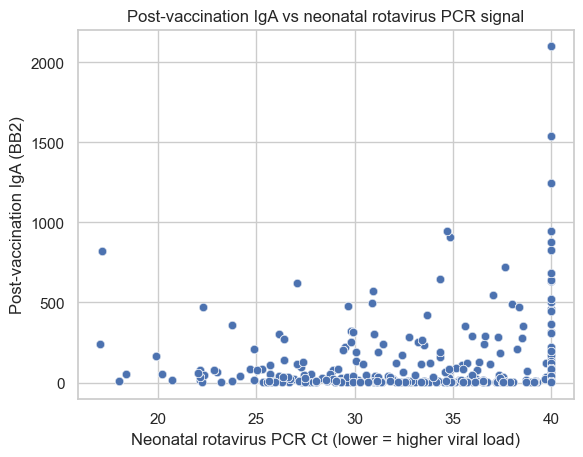

In [31]:
sns.scatterplot(
    data=df,
    x="min_RV1_Ct",
    y="BB2_IgA",
    alpha=0.6
)

plt.xlabel("Neonatal rotavirus PCR Ct (lower = higher viral load)")
plt.ylabel("Post-vaccination IgA (BB2)")
plt.title("Post-vaccination IgA vs neonatal rotavirus PCR signal")
plt.savefig("../figures/iga_vs_neonatal_ct.png", dpi=300, bbox_inches="tight")


plt.show()


Plot 2: IgA by country 

This helps explain why responses differ across populations.

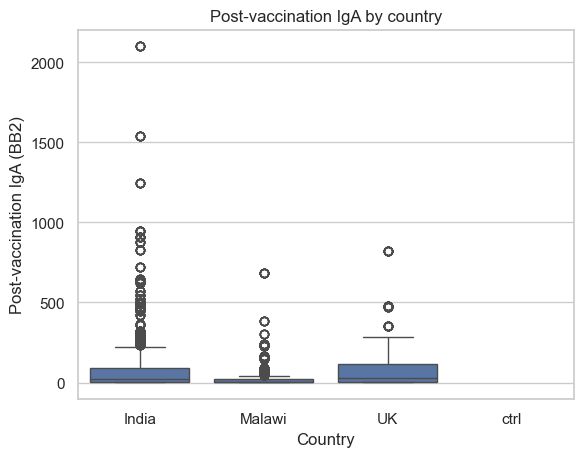

In [32]:
sns.boxplot(
    data=df,
    x="country",
    y="BB2_IgA"
)

plt.xlabel("Country")
plt.ylabel("Post-vaccination IgA (BB2)")
plt.title("Post-vaccination IgA by country")
plt.savefig("../figures/iga_by_country_raw_box.png", dpi=300, bbox_inches="tight")


plt.show()


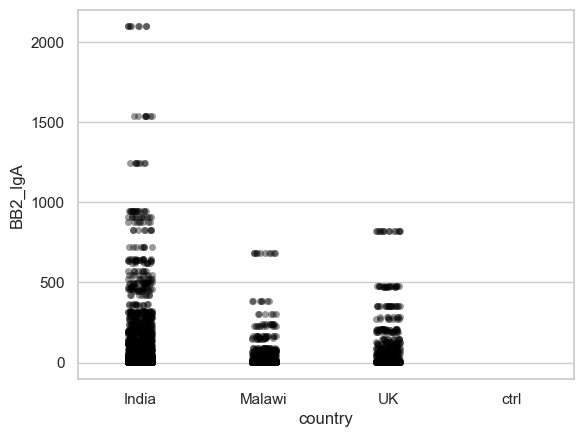

In [33]:
sns.stripplot(
    data=df,
    x="country",
    y="BB2_IgA",
    color="black",
    alpha=0.4,
    jitter=True
)
plt.savefig("../figures/iga_by_country_raw_strip.png", dpi=300, bbox_inches="tight")

plt.show()


In [34]:
df.groupby("country")["BB2_IgA"].median()


country
India     21.20
Malawi     5.78
UK        31.16
ctrl        NaN
Name: BB2_IgA, dtype: float64

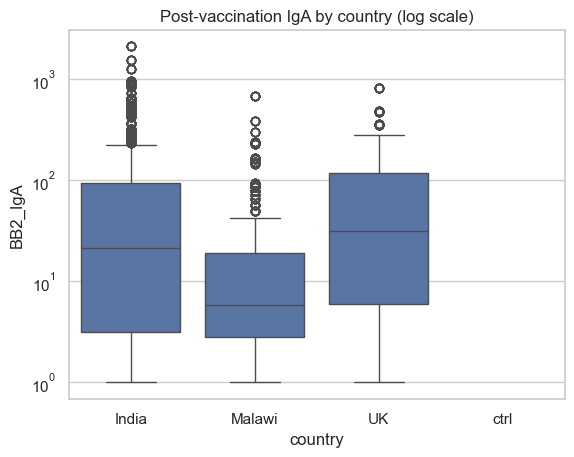

In [35]:
sns.boxplot(
    data=df,
    x="country",
    y="BB2_IgA"
)
plt.yscale("log")
plt.title("Post-vaccination IgA by country (log scale)")
plt.savefig("../figures/iga_by_country_log.png", dpi=300, bbox_inches="tight")

plt.show()


Although some infants in India exhibited very high IgA responses, the overall distribution was highly heterogeneous. UK infants showed more consistent IgA responses with higher central tendency, whereas Malawi infants had generally lower responses, which agrees with the study.

“Did the PCR ever detect rotavirus RNA in this neonatal sample?”

In [36]:
df["pcr_detected"] = df["min_RV1_Ct"] < 40


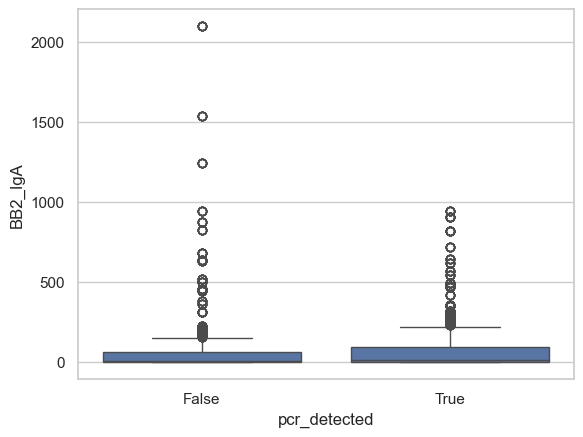

In [37]:
sns.boxplot(x="pcr_detected", y="BB2_IgA", data=df)
plt.savefig("../figures/iga_by_neo_box.png", dpi=300, bbox_inches="tight")




In [38]:
medians = (
    df.groupby("pcr_detected")["BB2_IgA"]
      .median()
      .reset_index()
)
print(medians)


   pcr_detected  BB2_IgA
0         False    11.24
1          True    16.04


In [39]:
df["BB2_IgA"].describe()



count    4044.000000
mean       89.164555
std       198.005646
min         1.000000
25%         3.980000
50%        13.430000
75%        82.150000
max      2100.000000
Name: BB2_IgA, dtype: float64

In [40]:
df.groupby("country")["BB2_IgA"].describe()


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
India,2569.0,105.745687,227.090982,1.0,3.15,21.20,92.78,2100.00
Malawi,887.0,36.200158,91.660075,1.0,2.80,5.78,19.13,682.59
UK,588.0,96.617772,162.010621,1.0,5.93,31.16,117.18,822.53
ctrl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.groupby("country")["BB2_IgA"].median().sort_values(ascending=False)


country
UK        31.16
India     21.20
Malawi     5.78
ctrl        NaN
Name: BB2_IgA, dtype: float64

In [42]:
import numpy as np

df["log_BB2_IgA"] = np.log10(df["BB2_IgA"] + 1)

df.groupby("country")["log_BB2_IgA"].describe()


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
India,2569.0,1.367690,0.789536,0.30103,0.618048,1.346353,1.972110,3.322426
Malawi,887.0,1.006334,0.611133,0.30103,0.579784,0.831230,1.303844,2.834796
UK,588.0,1.450629,0.726085,0.30103,0.840733,1.507316,2.072544,2.915679
ctrl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Descriptive statistics were used to quantify patterns observed in exploratory
visualizations. Post-vaccination IgA responses were highly right-skewed, with
medians substantially lower than means. Median IgA levels differed across
countries, with higher values observed in UK infants compared to Malawi, and
substantial variability among Indian infants.